# Evaluation terminale : Machine learning & python -- Aboulhadid Sara

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Réponse : Le machine learning sert à faire des prédictions et des classements à partir de données.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Réponse : Par exemple il y a les recommandations de produit qui utilise le machine learning. Ou bien encore des applications de reconaissance faciale, de traduction ou meme de prédiction météorologique.

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Réponse : Il y a les familles supervisées et non supervisées. Celle supervisée consiste à faire apprendre un ordinateur à partir de données étiquetées. Cela signifie que la machine travaille avec un jeu de données qui ont déjà été identifiées et catégorisées. Et la famille non supervisée se fait avec l'exécution des tâches par un algorithme sans une aide préalable. Les données sont adressées à la machine sans les résultats attendus. 

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Réponse : La classification utilise l'apprentissage supervisé. Et le clustering utilise l'apprentissage non supervisé.

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Réponse : Un arbre de décision est un outil de prise de décision qui permet de déterminer une action à effectuer ou une conclusion à tirer en suivant une série de branches logiques.
Sa construction est assez simple on commence par la racine et on descend en faisant les branches (possibilités differentes) et les noeuds sont les décisions à prendre. Jusqu'à arriver à une feuille, qui représente la conclusion à laquelle on parvient.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

Réponse : L'overfitting est lorsqu'on fait trop de traitement sur les données. C’est à dire que l'apprentissage commencera à trop coller aux données et ne pourra plus être généralisé.

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [23]:
# packages
import pandas as pd
#...
#from pandas_profiling import ProfileReport
# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


Importez les données comme suit :

In [24]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [25]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Réponse : La colonne "Name" doit etre enlevé du jeu de données. Car on cherche à trouver des groupes d’objets semblables et à 
organiser les donnees d’une maniere logique, ici les nom ne sont pas une donnée siginifiante et similaire.

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [26]:
# retire la colonne "Name" du dataset
data.drop(columns=['Name'],axis=1, inplace=True)

# retire Nan
data.drop(columns=['3P%'],axis=1, inplace=True)

#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Réponse : Oui, certaines données sont manquantes notamment dans la colonne "3P%" ou on retrouve dans le jeu de données beaucoup de valeur nulle.

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [5]:
# missing values processing
print(data.isnull().sum())

#data.dropna(inplace=True)

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [27]:
# def variables X/Y
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# separation 2 echantillon train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Réponse : Elle est indispensable car cela nous permet d'avoir des données d'entrainements et de test.

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [28]:
# calling decisiontree classifier
clf = DecisionTreeClassifier()

# fitting on data
clf = clf.fit(X_train, Y_train)


#### Exercice 2.5: Evaluez la qualité du modèle. 

In [32]:
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]

# accuracy
#accuracy_score(y_test, estimate, normalize=True, sample_weight=None)

#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

Réponse : Nous utilisons la métrique qui est la matrice de confusion en calculant l'accurracy

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Réponse : Oui, car la précision de la matrice est toujours calculée en prenant les valeurs moyennes présentes dans la diagonale principale soit l'accuracy.

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

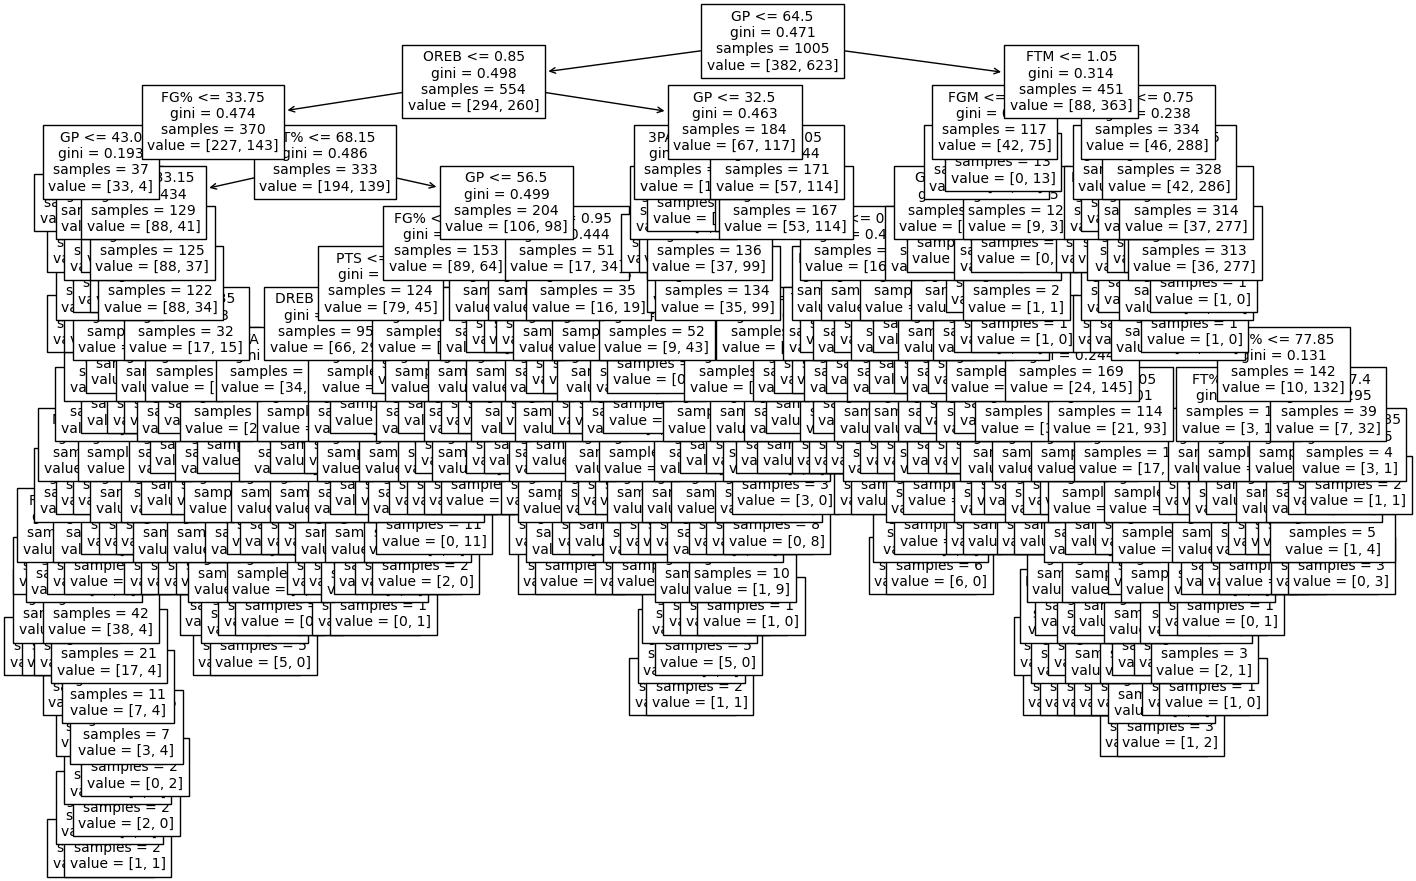

In [33]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Réponse : On a la courbe ROC.

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Réponse : On peut l'améliorer en utilisant un classifieur et utiliser la meilleure méthode.Voici 3 méthodes : les courbes de précision/recall ROC, AUC (Aire sous la courbe) et ERR (Erreur absolue moyenne), l'accuracy, et le f1-score.

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.01, 'random_state': 42}
best auc: 0.7062433475391416
0.6969639612356149


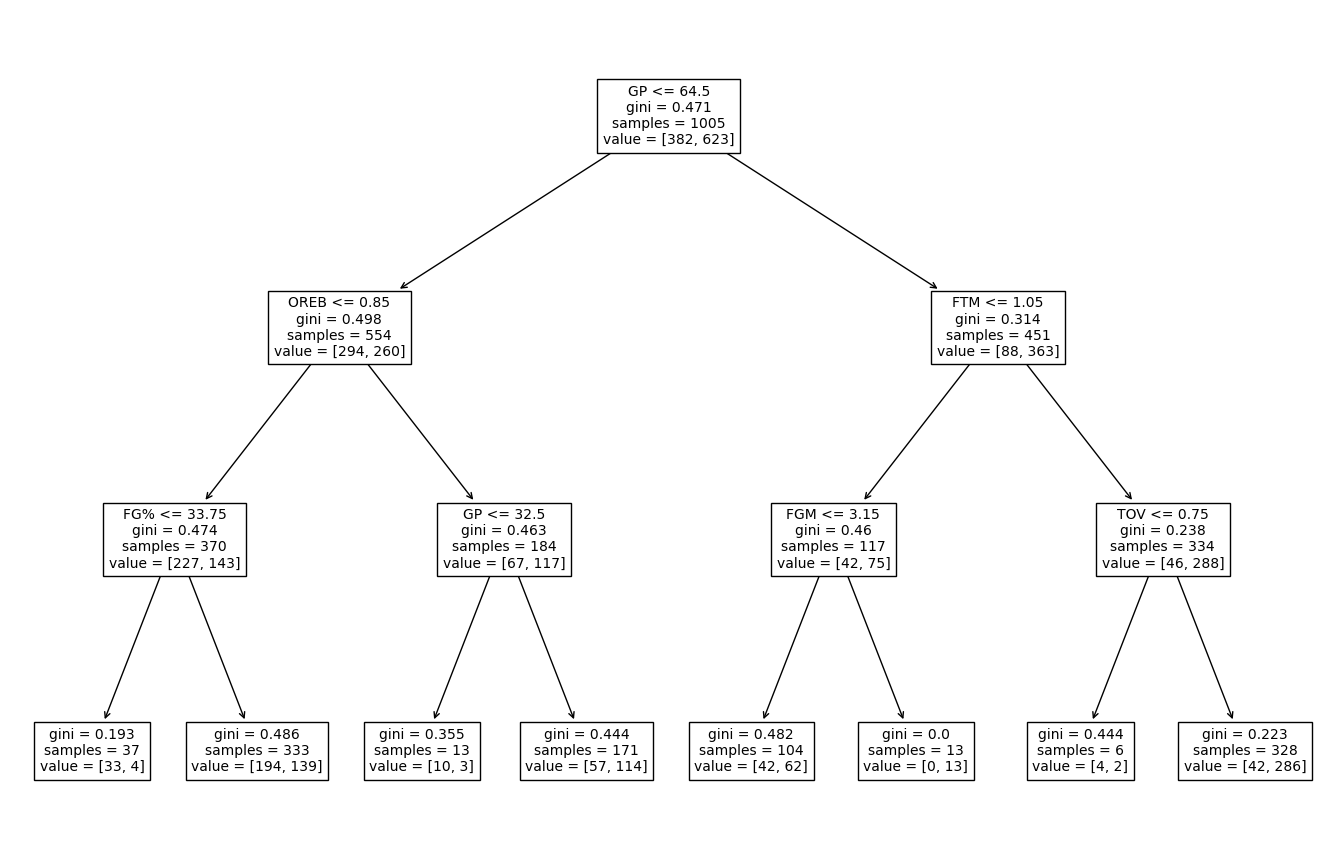

In [35]:
############################ Method use AUC 
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [42]}

# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=8)
# running search
grid_search_tree.fit(X, Y.values)

# getting best model
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

# calling decisiontree classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_split=0.1, random_state=42)
#
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()


#### Question 2.8: Concluez

Réponse : On utilise ici la methode de l'AUC. Lorsque l’on calcule l’aire sous la courbe, on obtient bien un AUC très proche du résultat attendu = 0.7